In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ad = pd.read_csv('actual_duration.csv')

ar = pd.read_csv('appointments_regional.csv')

nc = pd.read_excel('national_categories.xlsx')

tweets = pd.read_csv('tweets.csv')

In [2]:
# Check for duplicates
duplicate_rows_ar = ar.duplicated()
num_duplicates_ar = duplicate_rows_ar.sum()
num_duplicates_ar

# Remove duplicates
ar.drop_duplicates(inplace=True)

In [ ]:
# View the first five rows of the DataFrame
print(ar.head())

# Print the minimum and maximum dates pertaining to the ar data set
print("Minimum date:", ar['appointment_month'].min())
print("Maximum date:", ar['appointment_month'].max())

# Filter the data set to only look at the data from 2021-08 onwards
ar_filtered = ar[ar['appointment_month'] >= '2021-08']

# View the DataFrame after filtering
print(ar_filtered.head())

In [29]:
# Question 1
# Should the NHS start looking at increasing staff levels?
ar_df = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

ar_df_filtered = ar_df[(ar_df['appointment_month'] >= '2021-08') & (ar_df['appointment_month'] <= '2022-06')]

# Calculate the average utilisation of service
ar_df_filtered['utilisation'] = ar_df_filtered['count_of_appointments'] / 30  
ar_df_filtered['utilisation'] = ar_df_filtered['utilisation'].apply(lambda x: round(x , 1))

# View the DataFrame
print(ar_df_filtered.head())

   appointment_month  count_of_appointments  utilisation
19           2021-08               23843177     794772.6
20           2021-09               28514685     950489.5
21           2021-10               30296850    1009895.0
22           2021-11               30395923    1013197.4
23           2021-12               25132174     837739.1


C:\Users\todyl\AppData\Local\Temp\ipykernel_26396\561067206.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_df_filtered['utilisation'] = ar_df_filtered['count_of_appointments'] / 30
C:\Users\todyl\AppData\Local\Temp\ipykernel_26396\561067206.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_df_filtered['utilisation'] = ar_df_filtered['utilisation'].apply(lambda x: round(x , 1))


C:\Users\todyl\AppData\Local\Temp\ipykernel_26396\3706288182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_df_filtered['appointment_month'] = ar_df_filtered['appointment_month'].astype(str)
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


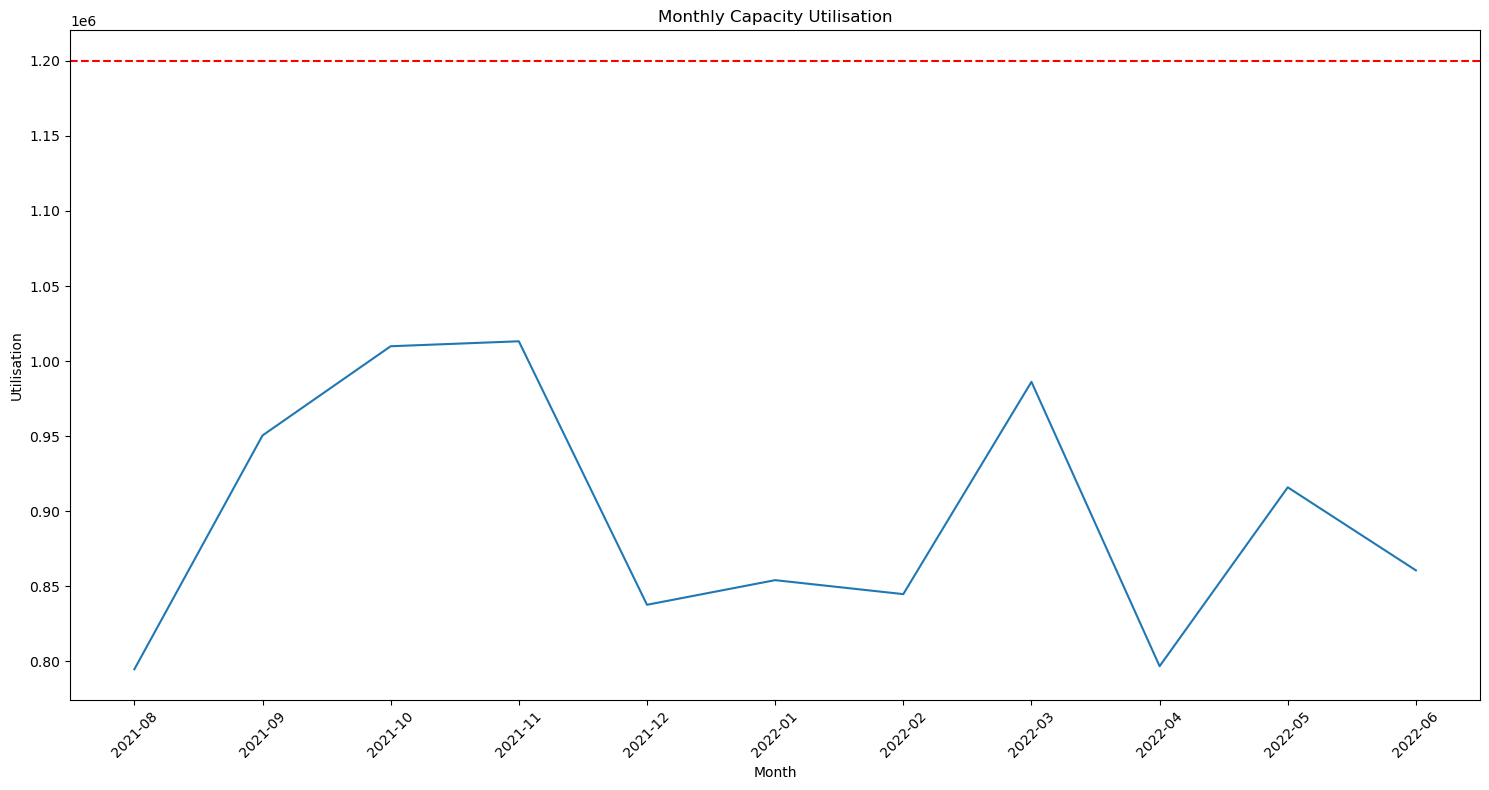

In [30]:
# Change datatype of appointment_month to string
ar_df_filtered['appointment_month'] = ar_df_filtered['appointment_month'].astype(str)

# Create lineplot for monthly capacity utilisation
plt.figure(figsize=(15, 8))
sns.lineplot(x='appointment_month', y='utilisation', data=ar_df_filtered)

# NHS Guideline for daily appointments
plt.axhline(y=1200000, color='r', linestyle='--', label='Threshold: 1,200,000')
plt.xticks(rotation=45)
plt.title('Monthly Capacity Utilisation')
plt.xlabel('Month')
plt.ylabel('Utilisation')
plt.tight_layout()
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_26396\3601862991.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_filtered_hcp['appointment_month'] = ar_filtered_hcp['appointment_month'].astype(str)
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


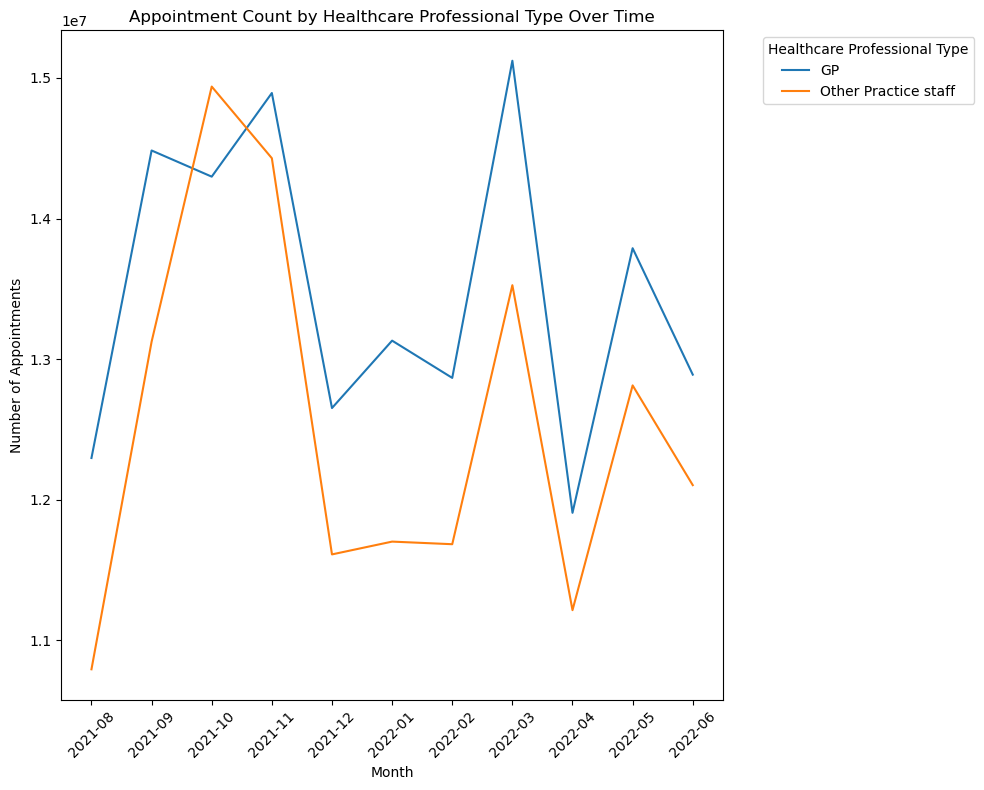

In [18]:
# Question 2 
# How do the healthcare professional types differ over time?

ar_agg = ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

ar_agg_filtered = ar_agg[(ar_agg['appointment_month'] >= '2021-08') & (ar_agg['appointment_month'] <= '2022-06')]

# Filter out 'Unknown' values
ar_filtered_hcp = ar_agg_filtered[ar_agg_filtered['hcp_type'] != 'Unknown']

# Change datatype of appointment_month to string
ar_filtered_hcp['appointment_month'] = ar_filtered_hcp['appointment_month'].astype(str)

# Create lineplot for number of monthly visits
plt.figure(figsize=(10, 8))

# Create a line plot to show the count of appointments for each healthcare professional type over time
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_filtered_hcp, errorbar=None)

# Set the title and labels
plt.title('Appointment Count by Healthcare Professional Type Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Healthcare Professional Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_26396\3042873365.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_filtered_status['appointment_month'] = ar_filtered_status['appointment_month'].astype(str)
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


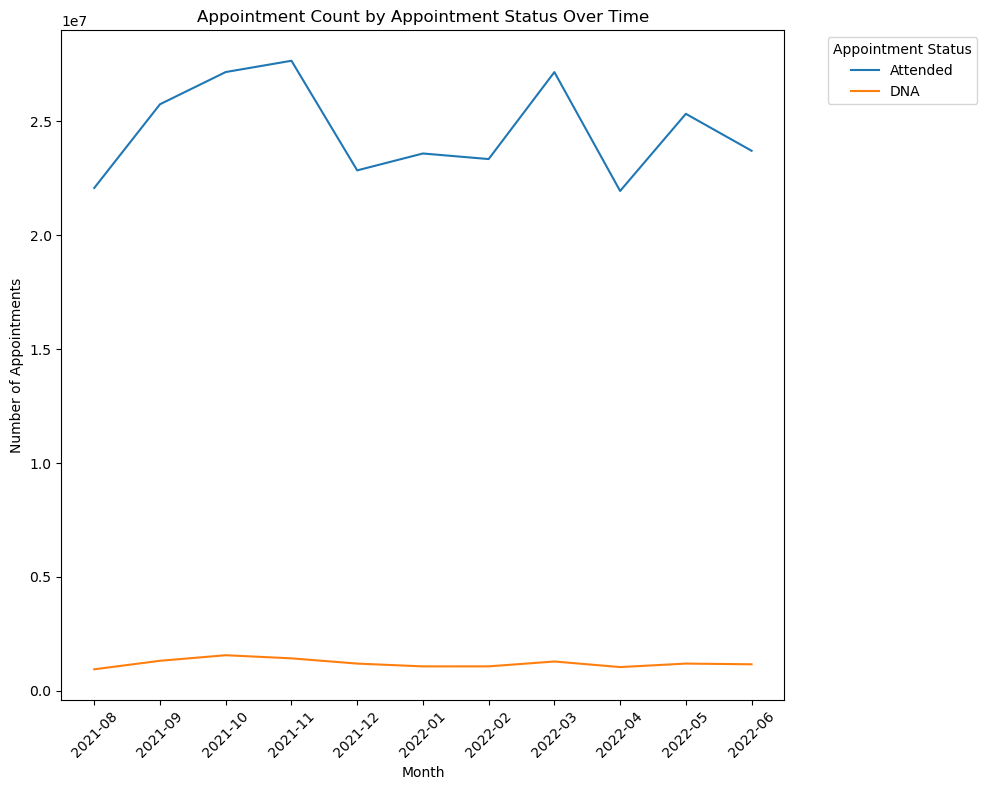

In [20]:
# Question 3
# Are there significant changes in whether or not visits are attended?

ar_agg = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

ar_agg_filtered = ar_agg[(ar_agg['appointment_month'] >= '2021-08') & (ar_agg['appointment_month'] <= '2022-06')]

# Filter out 'Unknown' values
ar_filtered_status = ar_agg_filtered[ar_agg_filtered['appointment_status'] != 'Unknown']

# Change datatype of appointment_month to string
ar_filtered_status['appointment_month'] = ar_filtered_status['appointment_month'].astype(str)

# Create lineplot for number of monthly visits
plt.figure(figsize=(10, 8))

# Create a line plot to show the count of appointments for each healthcare professional type over time
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_filtered_status, errorbar=None)

# Set the title and labels
plt.title('Appointment Count by Appointment Status Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [25]:
ar_agg_new = ar.groupby('appointment_status')['count_of_appointments'].sum().reset_index()

ar_agg_new


,appointment_status,count_of_appointments
0,Attended,677646088
1,DNA,30833015
2,Unknown,34050656


C:\Users\todyl\AppData\Local\Temp\ipykernel_26396\4139893254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_filtered_mode['appointment_month'] = ar_filtered_mode['appointment_month'].astype(str)
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


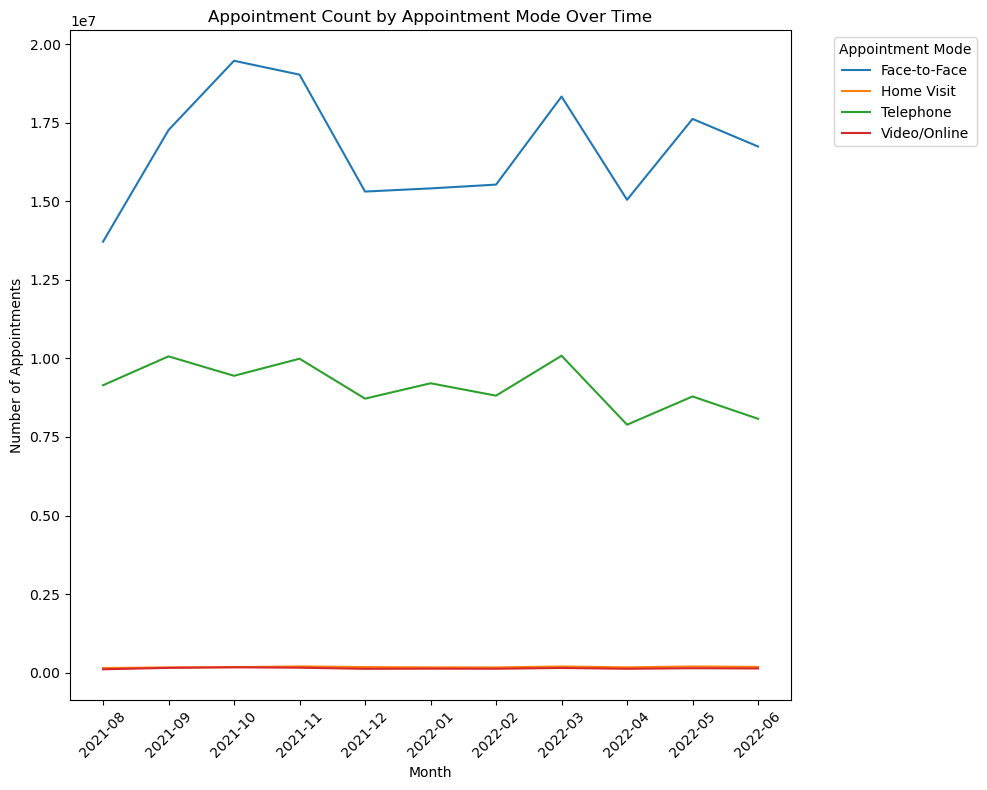

In [23]:
# Question 4
# Are there changes in terms of appointment type and the busiest months?

ar_agg = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

ar_agg_filtered = ar_agg[(ar_agg['appointment_month'] >= '2021-08') & (ar_agg['appointment_month'] <= '2022-06')]

# Filter out the 'Unknown' value in 'appointment_mode'
ar_filtered_mode = ar_agg_filtered[ar_agg_filtered['appointment_mode'] != 'Unknown']

# Change datatype of 'appointment_month' to string
ar_filtered_mode['appointment_month'] = ar_filtered_mode['appointment_month'].astype(str)

# Create lineplot for number of monthly visits
plt.figure(figsize=(10, 8))

# Create a line plot to show the count of appointments for each appointment mode over time
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_filtered_mode, errorbar=None)

# Set the title and labels
plt.title('Appointment Count by Appointment Mode Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_26396\3134898973.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_filtered_booking_appointment['appointment_month'] = ar_filtered_booking_appointment['appointment_month'].astype(str)
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

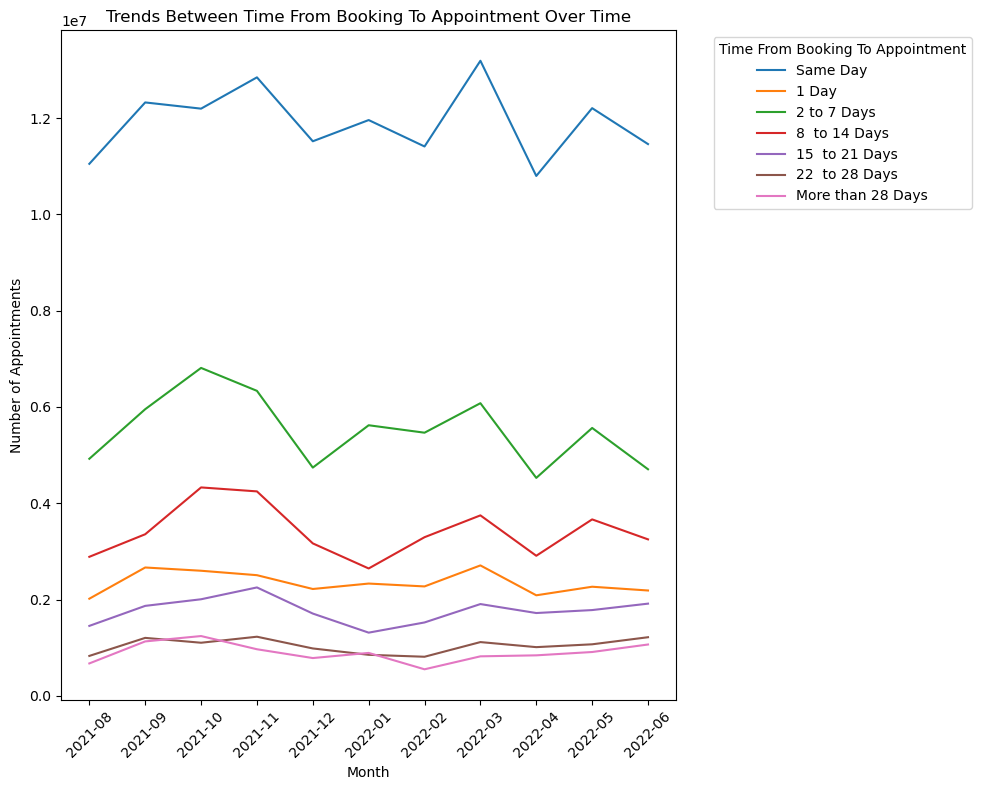

In [22]:
# Question 5
# Are there any trends in time between booking an appointment?

# Group by 'appointment_month' and 'time_between_book_and_appointment' and sum 'count_of_appointments'
ar_agg = ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

ar_agg_filtered = ar_agg[(ar_agg['appointment_month'] >= '2021-08') & (ar_agg['appointment_month'] <= '2022-06')]

# Filter out 'Unknown / Data Quality' values
ar_filtered_booking_appointment = ar_agg_filtered[
    (ar_agg_filtered['time_between_book_and_appointment'] != 'Unknown / Data Quality')
]

# Change datatype of 'appointment_month' to string for ease of plotting
ar_filtered_booking_appointment['appointment_month'] = ar_filtered_booking_appointment['appointment_month'].astype(str)

# Create a line plot to show the trends in time between booking and appointment over time
plt.figure(figsize=(10, 8))

# Define the order of categories for the legend
legend_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days']

# Create the line plot
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', 
             data=ar_filtered_booking_appointment, errorbar=None, hue_order=legend_order)

# Set the title and labels
plt.title('Trends Between Time From Booking To Appointment Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Time From Booking To Appointment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

  appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843


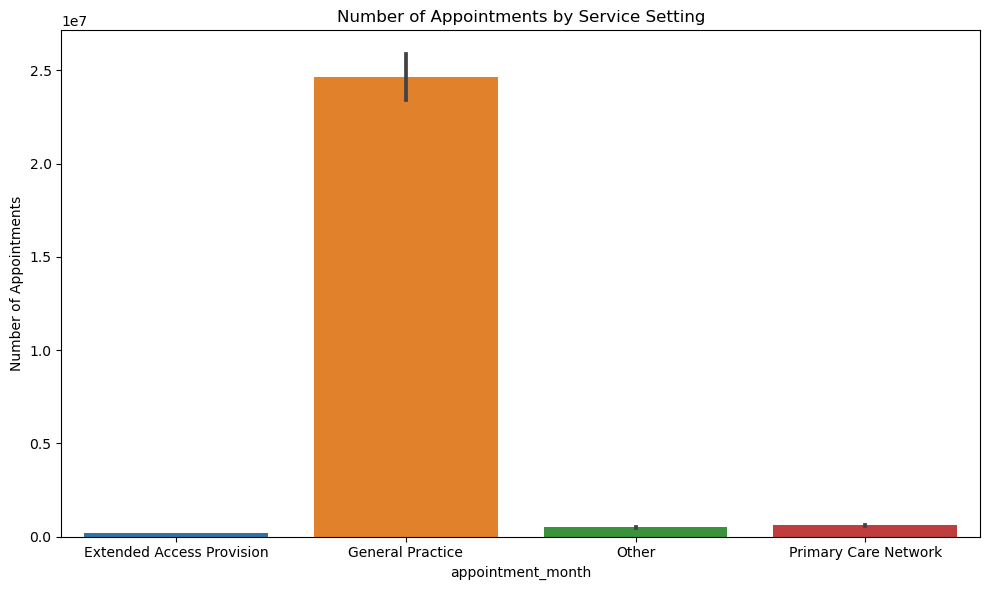

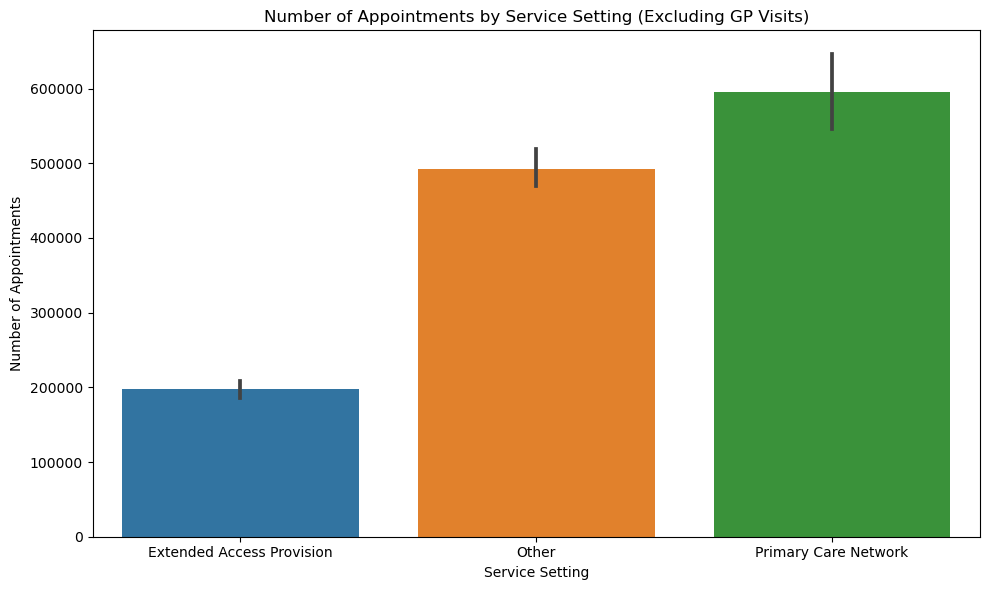

In [8]:
# Question 6 

# Group the month of appointment and number of appointments
service_settings_df = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the DataFrame
print(service_settings_df.head())

# Filter out 'Unmapped' values
service_settings_filtered = service_settings_df[
    (service_settings_df['service_setting'] != 'Unmapped')]


# Create a Seaborn barplot to compare service settings for the number of appointments
plt.figure(figsize=(10, 6))
sns.barplot(x='service_setting', y='count_of_appointments', data=service_settings_filtered)
plt.title('Number of Appointments by Service Setting')
plt.xlabel('appointment_month')
plt.ylabel('Number of Appointments')
plt.tight_layout()
plt.show()

# Create a Seaborn barplot excluding GP visits
plt.figure(figsize=(10, 6))
sns.barplot(x='service_setting', y='count_of_appointments', data=service_settings_filtered[service_settings_filtered['service_setting'] != 'General Practice'])
plt.title('Number of Appointments by Service Setting (Excluding GP Visits)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.tight_layout()
plt.show()